In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import cv2
import os
from matplotlib import pyplot as plt
import os
import cv2
import numpy as np
import pandas as pd
from torch.utils.data import TensorDataset, DataLoader,Dataset
from skimage.color import gray2rgb
import functools
import torch
from efficientnet_pytorch import EfficientNet
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential

import baselineUtils
import torch
import individual_TF
import scipy.io
from transformer.batch import subsequent_mask
import numpy as np
from matplotlib import pyplot as plt
import math
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import operator

In [2]:
## Data Preparation

device=torch.device("cpu")
model=individual_TF.IndividualTF(2, 3, 3, N=6,
                   d_model=512, d_ff=2048, h=8, dropout=0.1,mean=[0,0],std=[0,0]).to(device)
train_dataset,_ =  baselineUtils.create_dataset('datasets','merged_data',0,8,12,
                                               '\t',train=True,eval=True,verbose='store_true')
test_dataset,_ =  baselineUtils.create_dataset('datasets','merged_data',0,8,12,
                                               '\t',train=False,eval=True,verbose='store_true')

start loading dataset
validation set size -> 0
001 / 001 - loading merge_train.txt
start loading dataset
validation set size -> 0
001 / 001 - loading merge_test.txt


In [3]:
X_train = train_dataset.data['src'][:,:,:2] / 1000
y_train = train_dataset.data['trg'][:,:,:2] / 1000
X_test = test_dataset.data['src'][:,:,:2] / 1000
y_test = test_dataset.data['trg'][:,:,:2] / 1000

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# X_test = test_dataset.data['src'][:,:,:2] / 1000
# y_test = test_dataset.data['trg'][:,:,:2] / 1000

In [4]:
## Simple CNN LSTM Model

input = layers.Input(shape=(8, 2))
conv1 = layers.Conv1D(32, 2, activation='relu', padding='same')(input)
pool1 = layers.MaxPooling1D(pool_size=2)(conv1)
conv2 = layers.Conv1D(16, 2, activation='relu', padding='same')(pool1)
up1 = layers.UpSampling1D(3)(conv2)
# up2 = layers.UpSampling1D(2)(up1)
lstm1 = layers.LSTM(12,return_sequences=True)(up1)
# pool1 = layers.MaxPooling1D(pool_size=2)(lstm1)
#flatten1 = layers.Flatten()(lstm1)
# reshaped = layers.Reshape((1,24))(lstm1) 
dense1 = layers.Dense(2, activation='sigmoid')(lstm1)


cnn_lstm = Model(input, dense1)
cnn_lstm.compile(optimizer="adam", loss="mse")
cnn_lstm.summary()

history = cnn_lstm.fit(
    x=X_train, 
    y=y_train, 
    batch_size=64, 
    epochs=500, 
    shuffle='true', 
    validation_data=(X_test, y_test)
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8, 2)]            0         
                                                                 
 conv1d (Conv1D)             (None, 8, 32)             160       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 4, 32)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 4, 16)             1040      
                                                                 
 up_sampling1d (UpSampling1D  (None, 12, 16)           0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 12, 12)            1392  

Epoch 67/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0057 - val_loss: 0.0176
Epoch 68/500
243/243 [==============================] - 2s 10ms/step - loss: 0.0057 - val_loss: 0.0166
Epoch 69/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0056 - val_loss: 0.0156
Epoch 70/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0057 - val_loss: 0.0161
Epoch 71/500
243/243 [==============================] - 2s 8ms/step - loss: 0.0057 - val_loss: 0.0170
Epoch 72/500
243/243 [==============================] - 2s 8ms/step - loss: 0.0057 - val_loss: 0.0163
Epoch 73/500
243/243 [==============================] - 2s 8ms/step - loss: 0.0057 - val_loss: 0.0158
Epoch 74/500
243/243 [==============================] - 2s 9ms/step - loss: 0.0056 - val_loss: 0.0159
Epoch 75/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0056 - val_loss: 0.0157
Epoch 76/500
243/243 [==============================] - 2s 8ms/step - loss: 0.005

Epoch 147/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0053 - val_loss: 0.0155
Epoch 148/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0053 - val_loss: 0.0164
Epoch 149/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0054 - val_loss: 0.0153
Epoch 150/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0053 - val_loss: 0.0155
Epoch 151/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0053 - val_loss: 0.0160
Epoch 152/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0053 - val_loss: 0.0160
Epoch 153/500
243/243 [==============================] - 2s 8ms/step - loss: 0.0053 - val_loss: 0.0156
Epoch 154/500
243/243 [==============================] - 2s 8ms/step - loss: 0.0053 - val_loss: 0.0156
Epoch 155/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0053 - val_loss: 0.0160
Epoch 156/500
243/243 [==============================] - 2s 7ms/step - lo

243/243 [==============================] - 2s 7ms/step - loss: 0.0051 - val_loss: 0.0154
Epoch 227/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0051 - val_loss: 0.0153
Epoch 228/500
243/243 [==============================] - 2s 8ms/step - loss: 0.0051 - val_loss: 0.0151
Epoch 229/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0051 - val_loss: 0.0151
Epoch 230/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0051 - val_loss: 0.0152
Epoch 231/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0051 - val_loss: 0.0152
Epoch 232/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0051 - val_loss: 0.0162
Epoch 233/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0051 - val_loss: 0.0147
Epoch 234/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0051 - val_loss: 0.0151
Epoch 235/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0050 - v

243/243 [==============================] - 2s 7ms/step - loss: 0.0050 - val_loss: 0.0148
Epoch 306/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0050 - val_loss: 0.0156
Epoch 307/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0049 - val_loss: 0.0149
Epoch 308/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0049 - val_loss: 0.0147
Epoch 309/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0049 - val_loss: 0.0144
Epoch 310/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0050 - val_loss: 0.0145
Epoch 311/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0049 - val_loss: 0.0150
Epoch 312/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0049 - val_loss: 0.0151
Epoch 313/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0049 - val_loss: 0.0161
Epoch 314/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0049 - v

243/243 [==============================] - 2s 7ms/step - loss: 0.0049 - val_loss: 0.0147
Epoch 385/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0048 - val_loss: 0.0153
Epoch 386/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0048 - val_loss: 0.0149
Epoch 387/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0048 - val_loss: 0.0155
Epoch 388/500
243/243 [==============================] - 2s 8ms/step - loss: 0.0048 - val_loss: 0.0151
Epoch 389/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0048 - val_loss: 0.0155
Epoch 390/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0048 - val_loss: 0.0152
Epoch 391/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0048 - val_loss: 0.0149
Epoch 392/500
243/243 [==============================] - 2s 8ms/step - loss: 0.0049 - val_loss: 0.0162
Epoch 393/500
243/243 [==============================] - 2s 8ms/step - loss: 0.0048 - v

243/243 [==============================] - 2s 7ms/step - loss: 0.0048 - val_loss: 0.0149
Epoch 464/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0047 - val_loss: 0.0145
Epoch 465/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0047 - val_loss: 0.0150
Epoch 466/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0047 - val_loss: 0.0150
Epoch 467/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0047 - val_loss: 0.0149
Epoch 468/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0047 - val_loss: 0.0153
Epoch 469/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0047 - val_loss: 0.0150
Epoch 470/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0047 - val_loss: 0.0144
Epoch 471/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0048 - val_loss: 0.0142
Epoch 472/500
243/243 [==============================] - 2s 7ms/step - loss: 0.0047 - v

In [5]:
y_pred = cnn_lstm.predict(X_test)

64/64 [==============================] - 1s 2ms/step


In [6]:
y_pred[21] * 1000

array([[424.9792 , 860.50354],
       [407.53168, 909.83746],
       [393.86624, 901.46423],
       [322.25327, 898.60736],
       [308.3203 , 887.7732 ],
       [314.62213, 881.7931 ],
       [226.32065, 880.25757],
       [275.88812, 849.42676],
       [328.15527, 837.20123],
       [338.54745, 833.3456 ],
       [356.8098 , 825.6427 ],
       [374.0059 , 816.5781 ]], dtype=float32)

In [7]:
y_test[21] * 1000

array([[380.40328979, 998.33178711],
       [300.33624268, 993.69543457],
       [323.07052612, 983.66821289],
       [351.5682373 , 961.30413818],
       [381.58251953, 955.46984863],
       [436.29336548, 940.38537598],
       [483.84616089, 881.81640625],
       [542.2869873 , 904.34906006],
       [598.95501709, 820.43304443],
       [651.20135498, 823.7845459 ],
       [721.06384277, 792.59893799],
       [742.57769775, 773.11444092]])

## Results on Test Data

In [8]:
## FDE
y_pred = y_pred * 1000
y_test = y_test * 1000
ssum = 0
for i in range(y_pred.shape[0]):
    ssum += math.dist(y_pred[i][-1], y_test[i][-1])
mean_fde = ssum / (i+1)
print("The mean FDE is ",mean_fde)

The mean FDE is  219.18955387363815


In [9]:
ssum = 0
for i in range(y_pred.shape[0]):
    local_sum = 0
    for j in range(y_pred[i].shape[0]):
        local_sum += math.dist(y_pred[i][j], y_test[i][j])
    ssum += local_sum / (j+1)
mean_ade = ssum / (i+1)
print("The mean ADE is ",mean_ade)

The mean ADE is  136.74869766986188


## Results on Train Data

In [10]:
y_pred = cnn_lstm.predict(X_train)
y_pred = y_pred * 1000
y_train = y_train * 1000
ssum = 0
for i in range(y_pred.shape[0]):
    ssum += math.dist(y_pred[i][-1], y_train[i][-1])
mean_fde = ssum / (i+1)
print("The mean FDE is ",mean_fde)

485/485 [==============================] - 1s 2ms/step
The mean FDE is  112.5995418645399


In [11]:
ssum = 0
for i in range(y_pred.shape[0]):
    local_sum = 0
    for j in range(y_pred[i].shape[0]):
        local_sum += math.dist(y_pred[i][j], y_train[i][j])
    ssum += local_sum / (j+1)
mean_ade = ssum / (i+1)
print("The mean ADE is ",mean_ade)

The mean ADE is  77.07183950532136


In [12]:
locations = np.empty((10,10,2))
for i in range(10):
    for j in range(10):
        locations[i][j][0] = i*100
        locations[i][j][1] = j*100

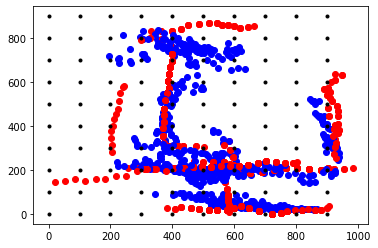

In [13]:
plt.plot(locations[:,:,0], locations[:,:,1], ls="None", marker=".",color='black')
for i in range(0,50):
    plt.scatter(y_pred[i][:,0], y_pred[i][:,1], color='blue')
    plt.scatter(y_train[i][:,0], y_train[i][:,1], color='red')
plt.show()  